## Task 1

Here we have a classification problem, so we are going to use the following roadmap suggested by sklearn: \
![roadmap](./images/ml-map.png)

In [76]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier


%matplotlib inline

In [77]:
SEED = 7412

np.random.seed(SEED)
random.seed(SEED)


In [78]:
df = pd.read_csv("data_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [80]:
X = df.drop(["diagnosis", "id"], axis=1) 

In [81]:
def display_boxplots(df):
    fig, axes = plt.subplots(3, 10, figsize=(20, 20))
    axes = axes.flatten()

    for i, el in enumerate(list(df.columns.values)[:-1]):
        df.boxplot(column=el, ax=axes[i])
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [82]:
# display_boxplots(X)

In [83]:

scaler = MinMaxScaler()
X_sc = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [84]:
# display_boxplots(X_sc)

In [85]:
Y = df["diagnosis"]
X_train_sc, X_test_sc, Y_train_sc, Y_test_sc = train_test_split(X_sc, Y, test_size=0.3)

In [86]:
# plt.figure(figsize=(12, 6))
# for column in X_s2.columns:
#     plt.plot(X_s2[column], label=column)
# plt.title('Data from X')
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.legend()
# plt.show()


### Reminders



**Precision and recall:** \
![precision-and-recall](./images/precision-recall.png)

**F score:** \
$
{\displaystyle F_{\beta }=(1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{(\beta ^{2}\cdot \mathrm {precision} )+\mathrm {recall} }}}
$

**Support Vector Classification:** \
The goal is to find a hyperplane in N-dimensional space which divides the data points into two categories (N - is the number of features in the dataset, here we have 30 features).

![svc](./images/svc.png)

In [87]:
svc = LinearSVC()
svc.fit(X_train_sc, Y_train_sc)
y_pred_svc = svc.predict(X_test_sc)
report = classification_report(y_pred_svc, Y_test_sc, output_dict=True)
print(classification_report(y_pred_svc, Y_test_sc))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       107
           M       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



The accuracy is $99\%$, which is not a bad result.
Now we can define the most important features for this classification: greater the coefficient greater the impact on the result.

In [88]:
importance = abs(svc.coef_[0])

importance_df_svc = pd.DataFrame({"Feature": X.columns, "Importance": importance})
importance_df_svc_sorted = importance_df_svc.sort_values(by="Importance", ascending=False)
importance_df_svc_sorted.head()

,Feature,Importance
10,radius_se,1.763138
7,concave points_mean,1.562774
20,radius_worst,1.256232
21,texture_worst,1.236568
9,fractal_dimension_mean,1.162231


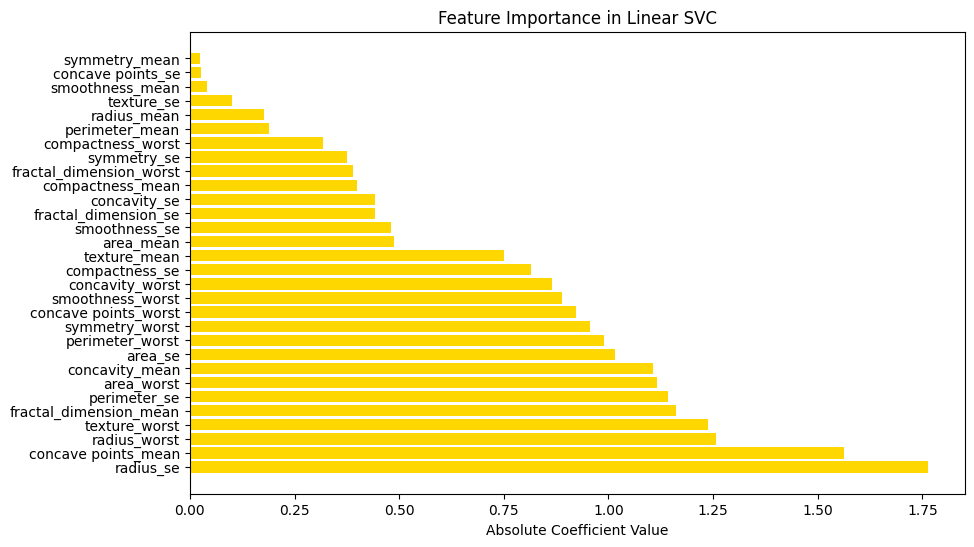

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df_svc_sorted["Feature"], importance_df_svc_sorted["Importance"], color="gold")
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance in Linear SVC")
plt.show()

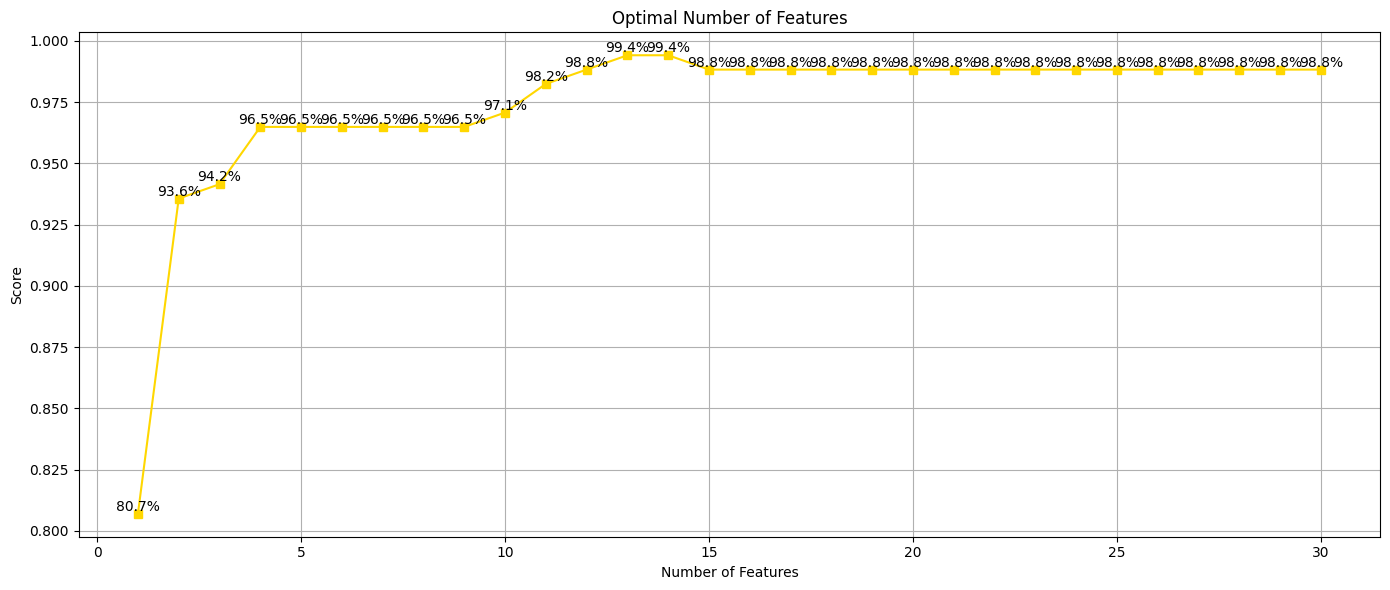

In [90]:
scores = []
for n in range(1, len(X.columns)+1):
    svc = LinearSVC()
    svc.fit(X_train_sc[importance_df_svc_sorted["Feature"][:n]], Y_train_sc)
    scores.append(svc.score(X_test_sc[importance_df_svc_sorted["Feature"][:n]], Y_test_sc))

plt.figure(figsize=(14, 6))
plt.plot(range(1, len(X.columns)+1), scores, marker="s", color="gold", label="accuracy")
plt.title("Optimal Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.grid()
plt.tight_layout()
for i, score in enumerate(scores):
    plt.text(i + 1, score, f"{score*100:.1f}%", ha='center', va='bottom')
plt.show()

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [92]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)
y_pred_dtree = dtree.predict(X_test)
print(classification_report(Y_test, y_pred_dtree))

              precision    recall  f1-score   support

           B       0.96      0.93      0.94       109
           M       0.88      0.94      0.91        62

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



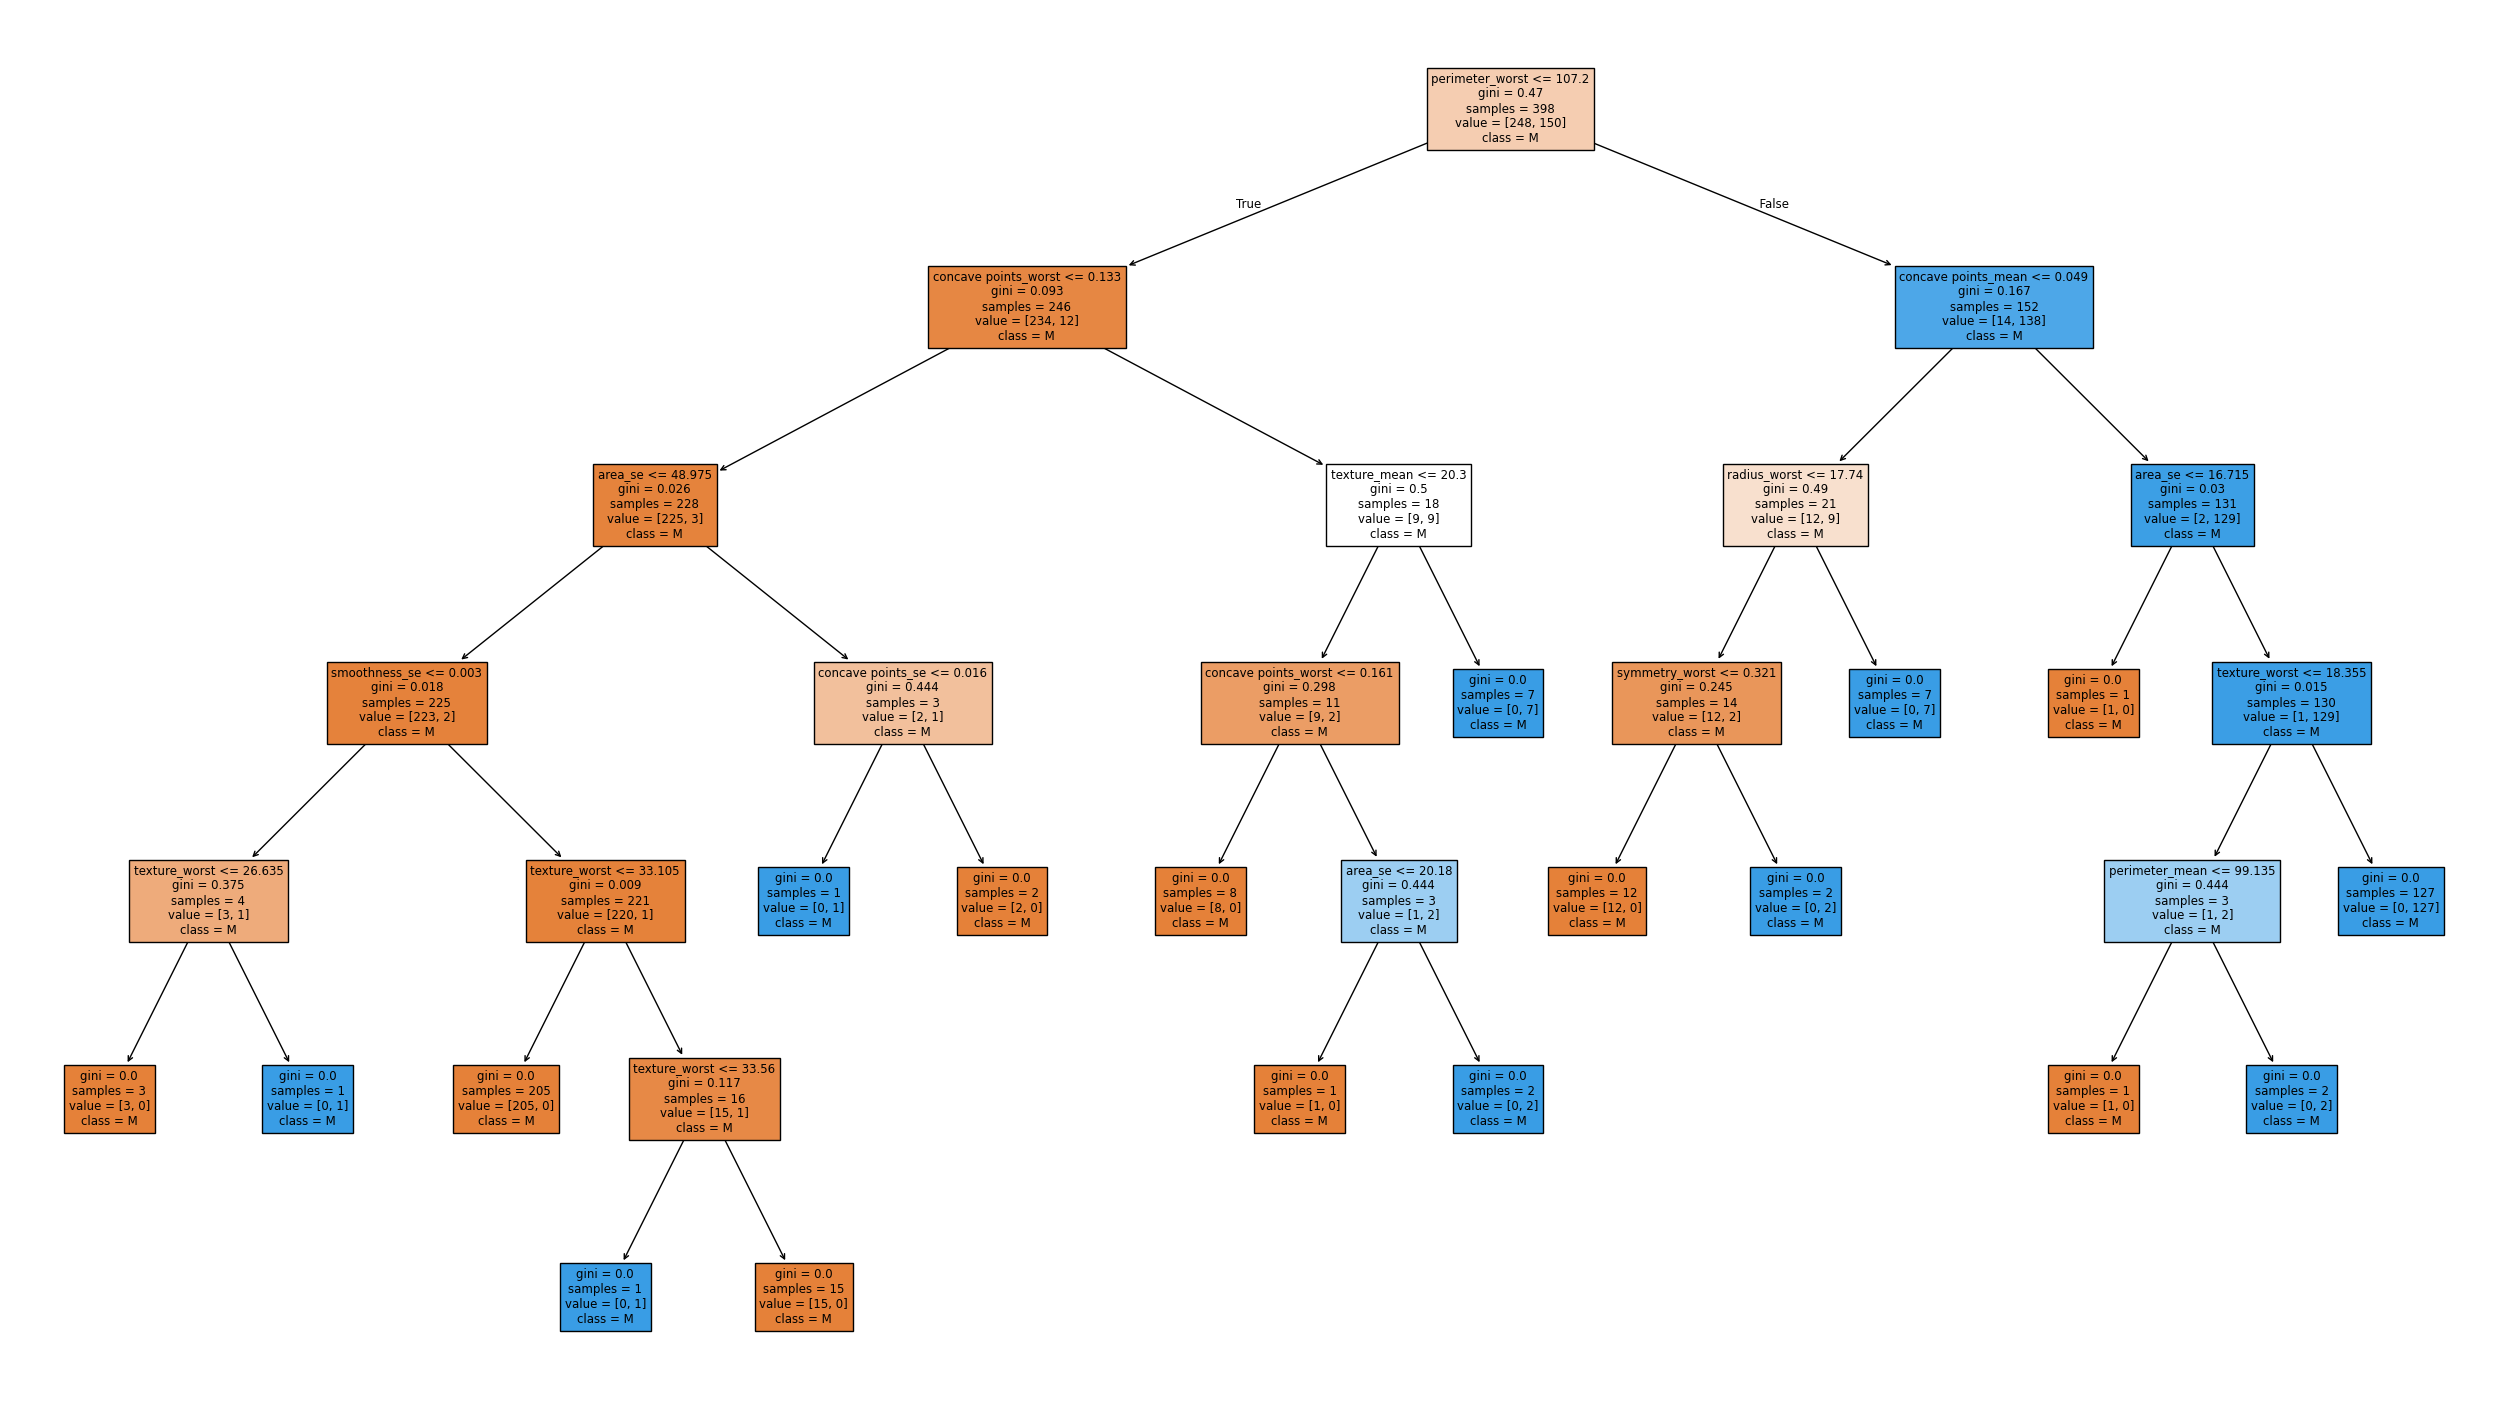

In [93]:
plt.figure(figsize=(32, 18))
plot_tree(dtree, class_names=Y.values, feature_names=X.columns, filled=True);

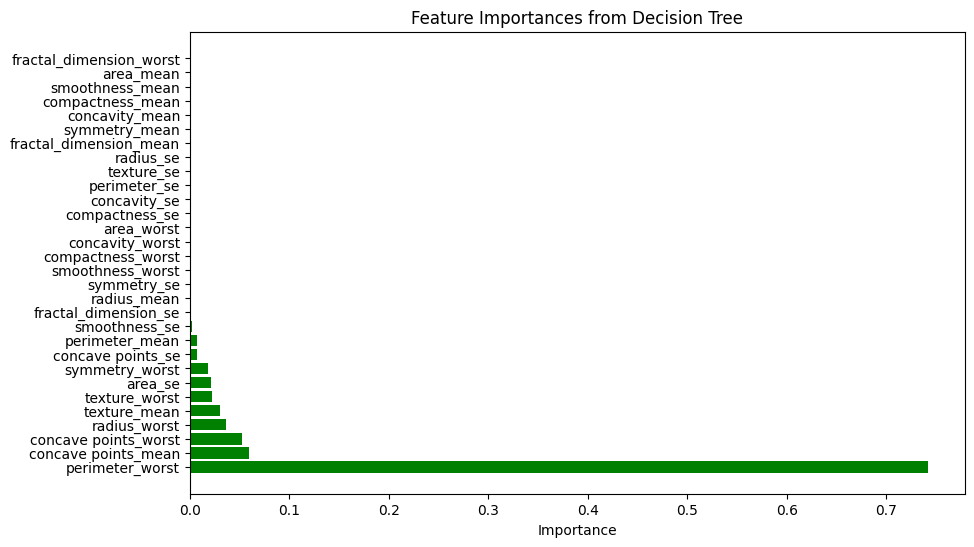

In [94]:
importances_dtree = dtree.feature_importances_
importance_df_dtree = pd.DataFrame({'Feature': X.columns, 'Importance': importances_dtree})
importance_df_dtree_sorted = importance_df_dtree.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_dtree_sorted['Feature'], importance_df_dtree_sorted['Importance'], color="green")
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

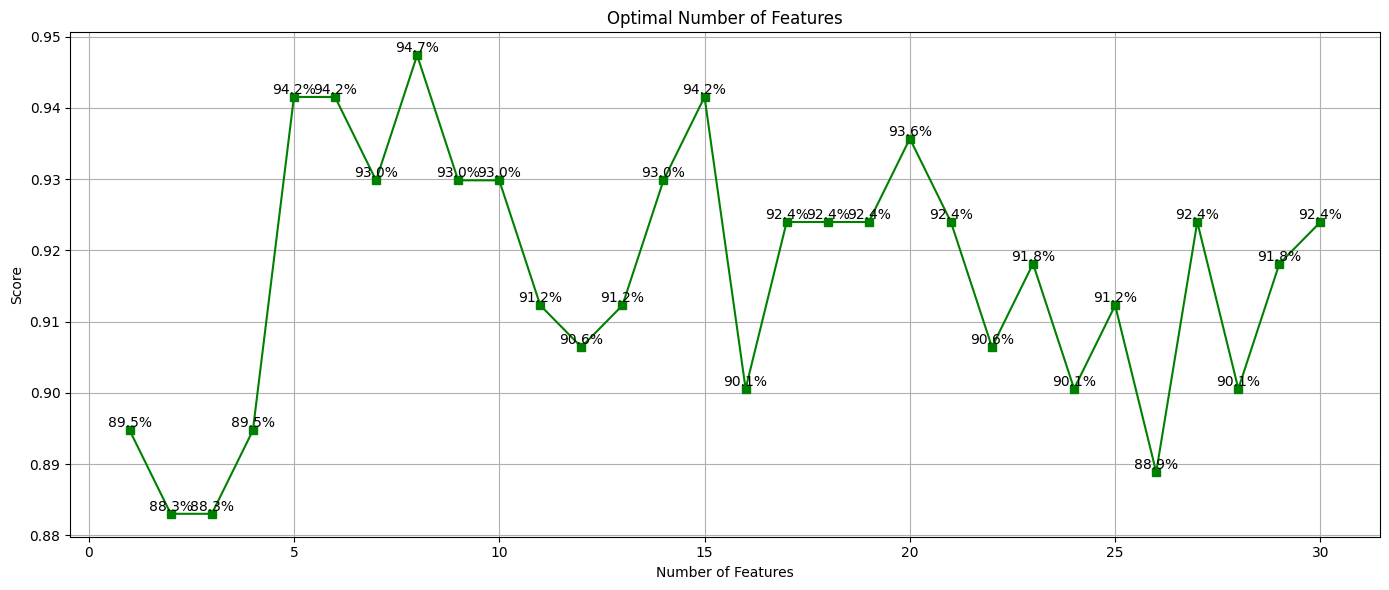

In [95]:
scores = []
for n in range(1, len(X.columns)+1):
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train[importance_df_dtree_sorted["Feature"][:n]], Y_train)
    scores.append(dtree.score(X_test[importance_df_dtree_sorted["Feature"][:n]], Y_test))

plt.figure(figsize=(14, 6))
plt.plot(range(1, len(X.columns)+1), scores, marker="s", color="green", label="accuracy")
plt.title("Optimal Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.grid()
plt.tight_layout()
for i, score in enumerate(scores):
    plt.text(i + 1, score, f"{score*100:.1f}%", ha='center', va='bottom')
plt.show()

In [96]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           B       0.99      0.94      0.97       109
           M       0.91      0.98      0.95        62

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



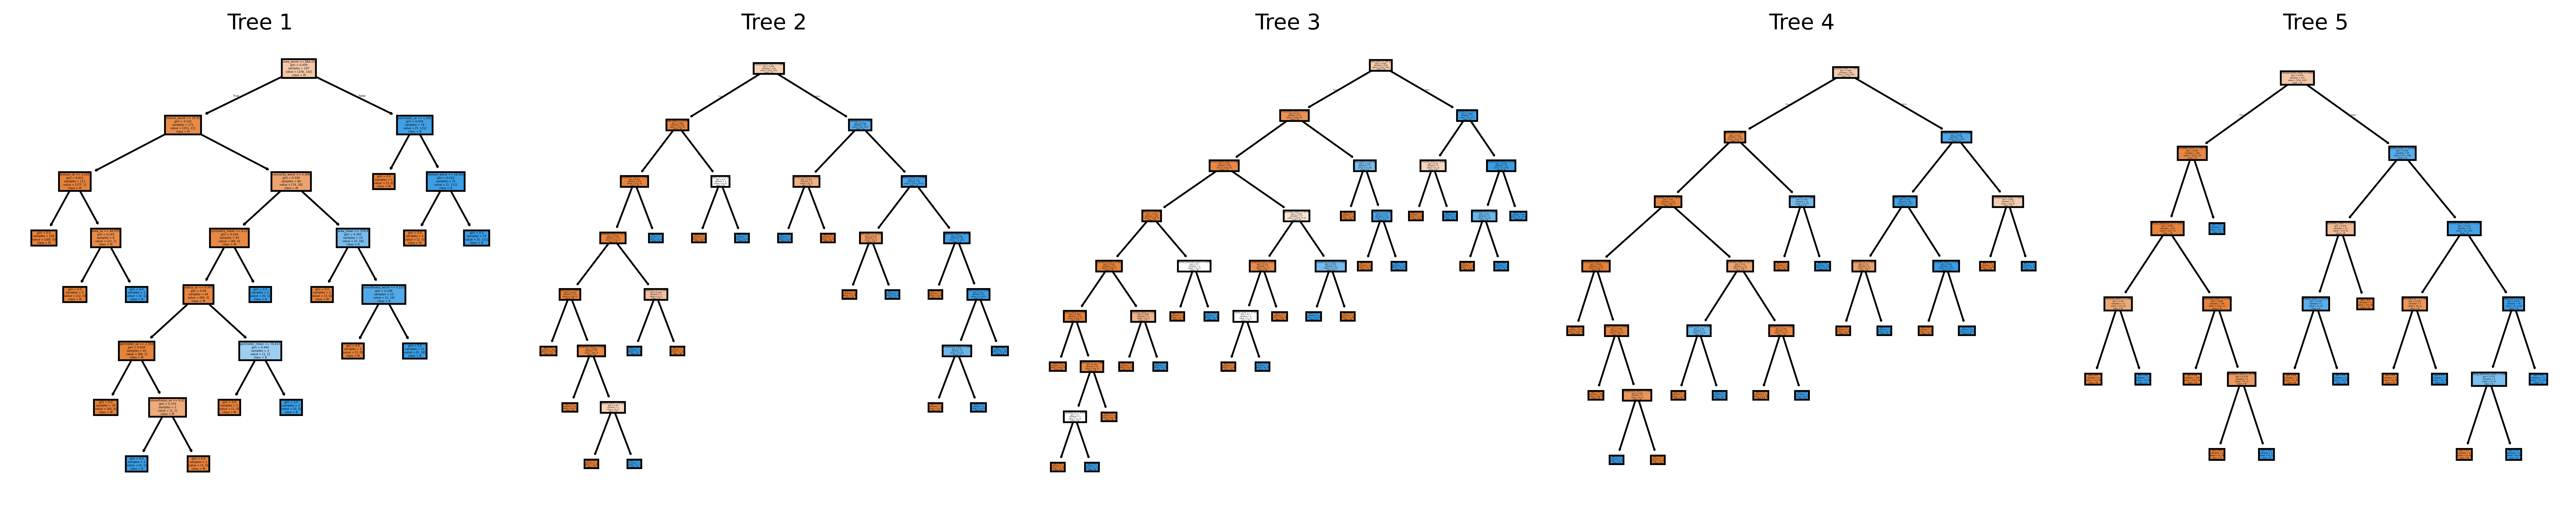

In [97]:
num_trees = 5
random_indices = np.random.choice(range(num_trees), size=num_trees, replace=False)
fig, axes = plt.subplots(nrows=1, ncols=num_trees, figsize=(20, 4), dpi=800)
for i, idx in enumerate(random_indices):
    plot_tree(rf.estimators_[idx],
              feature_names=X.columns,
              class_names=Y.unique(),
              filled=True,
              ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')
plt.tight_layout()
plt.show()

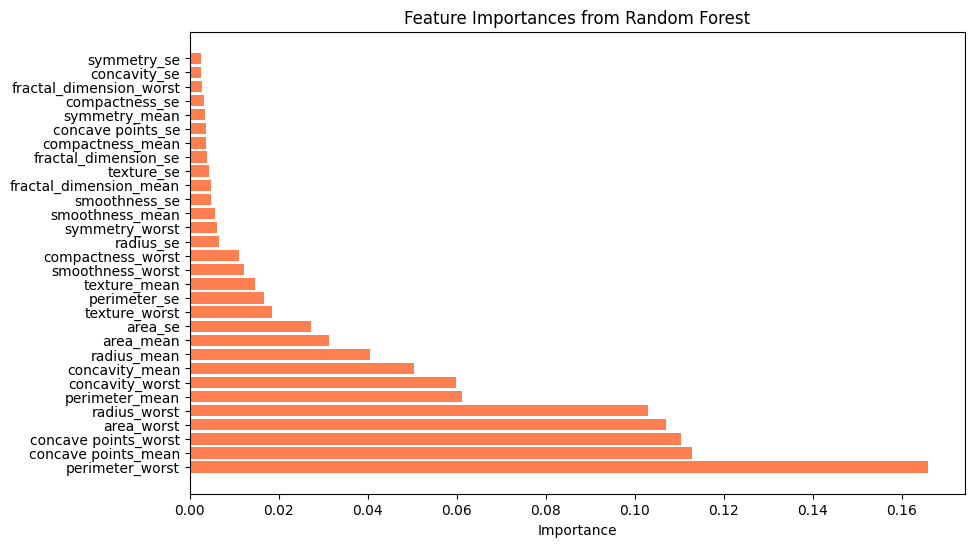

In [98]:
importances_rf = rf.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
importance_df_rf_sorted = importance_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf_sorted['Feature'], importance_df_rf_sorted['Importance'], color="coral")
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

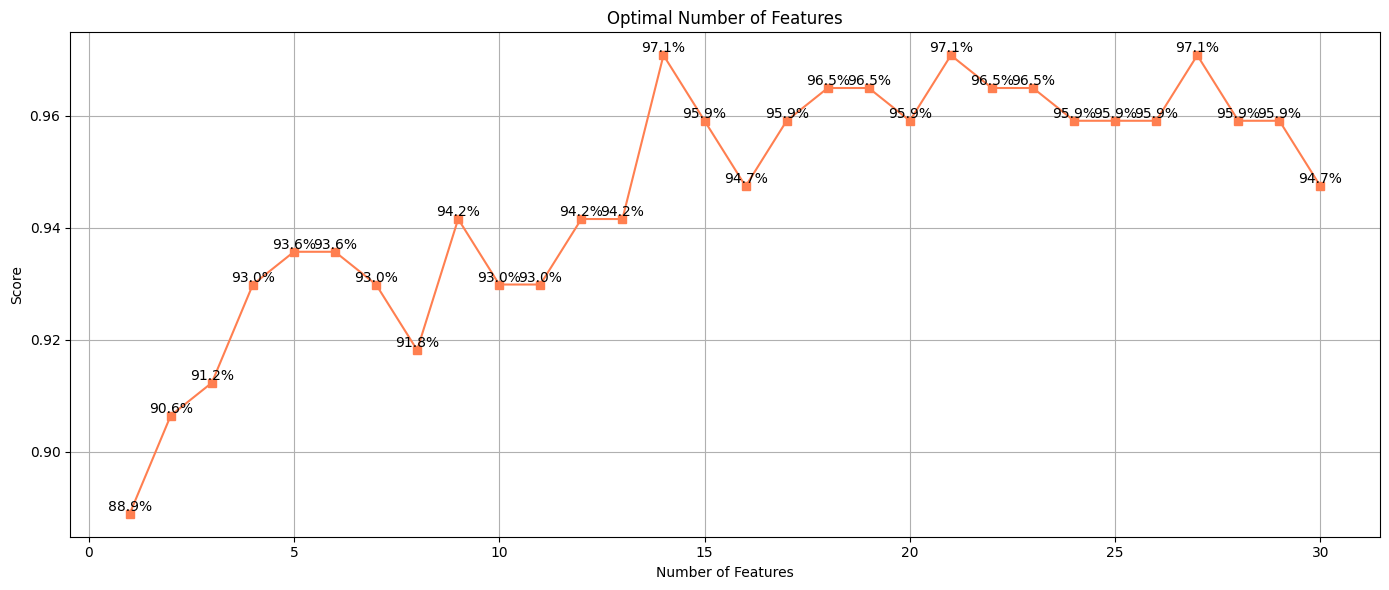

In [99]:
scores = []
for n in range(1, len(X.columns)+1):
    rf = RandomForestClassifier()
    rf.fit(X_train[importance_df_rf_sorted["Feature"][:n]], Y_train)
    scores.append(rf.score(X_test[importance_df_rf_sorted["Feature"][:n]], Y_test))

plt.figure(figsize=(14, 6))
plt.plot(range(1, len(X.columns)+1), scores, marker="s", color="coral", label="accuracy")
plt.title("Optimal Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.grid()
plt.tight_layout()
for i, score in enumerate(scores):
    plt.text(i + 1, score, f"{score*100:.1f}%", ha='center', va='bottom')
plt.show()

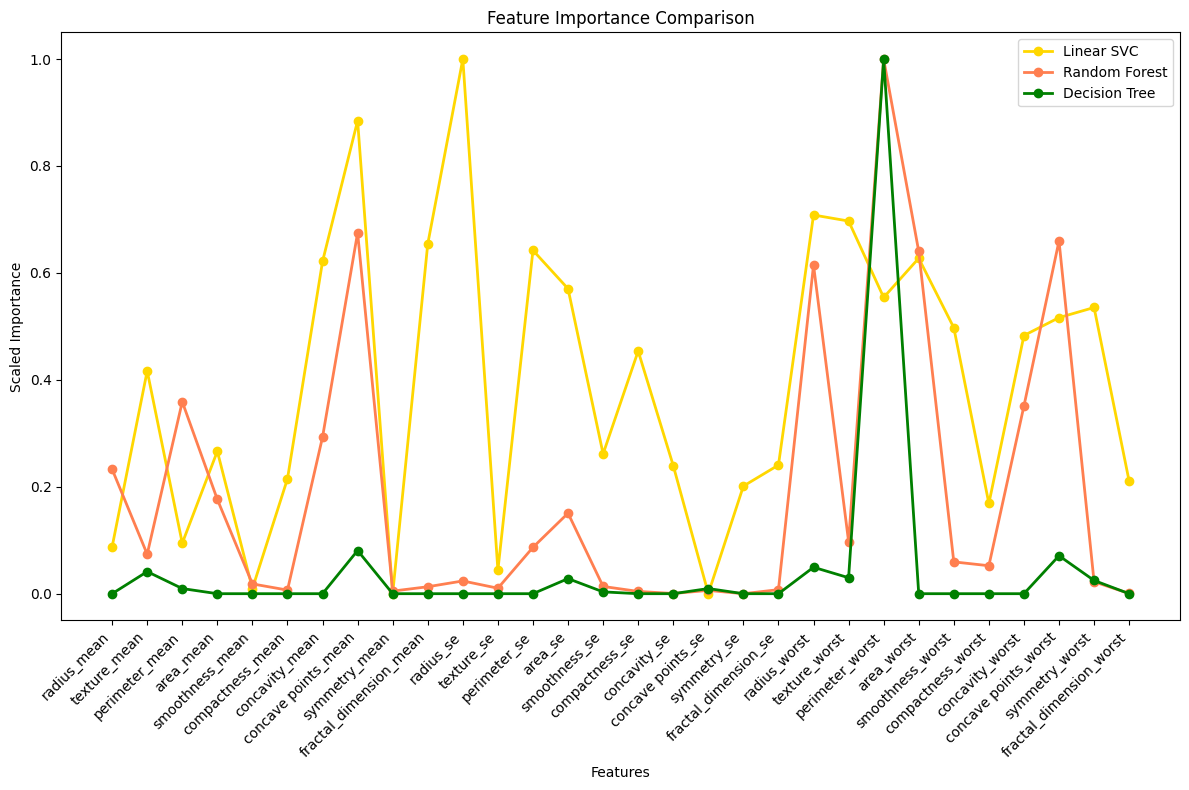

In [100]:
importance_df_svc["Scaled Importance"] = (importance_df_svc["Importance"] - importance_df_svc["Importance"].min()) / (importance_df_svc["Importance"].max() - importance_df_svc["Importance"].min())
importance_df_rf["Scaled Importance"] = (importance_df_rf["Importance"] - importance_df_rf["Importance"].min()) / (importance_df_rf["Importance"].max() - importance_df_rf["Importance"].min())
importance_df_dtree["Scaled Importance"] = (importance_df_dtree["Importance"] - importance_df_dtree["Importance"].min()) / (importance_df_dtree["Importance"].max() - importance_df_dtree["Importance"].min())
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(importance_df_svc))
plt.plot(x_pos, importance_df_svc["Scaled Importance"], marker='o', color='gold', label='Linear SVC', linewidth=2)
plt.plot(x_pos, importance_df_rf["Scaled Importance"], marker='o', color='coral', label='Random Forest', linewidth=2)
plt.plot(x_pos, importance_df_dtree["Scaled Importance"], marker='o', color='green', label='Decision Tree', linewidth=2)
plt.xticks(x_pos, importance_df_svc["Feature"].tolist(), rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Scaled Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()